In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/ws/DepthZNCC/build/nvcc-x64-debug/data/log.csv')
df['znccTime'] = df['znccTime'] / 1000000 # convert to s
df['postprocTime'] = df['postprocTime'] / 1000 # convert to ms
df = df[df['method'] != 'OPENCL_OPT1']
df = df[df['method'] != 'OPENCL_OPT3']

methods = df['method'].unique()

cpu_methods = ['SINGLE_THREADED', 'MULTI_THREADED', 'OPENMP', 'SIMD']
gpu_methods = ['CUDA', 'OPENCL', 'OPENCL_OPT']


df.head()

,method,platformId,resizeFactor,winSize,maxDisp,ccThresh,occThresh,znccTime,postprocTime
0,OPENCL,1,2,15,32,8,4,3.006209,186.150
1,OPENCL,1,2,15,64,16,8,5.685453,182.812
2,OPENCL,1,2,15,128,32,16,11.082419,173.763
3,OPENCL,1,2,25,32,8,4,7.844381,190.917
4,OPENCL,1,2,25,64,16,8,15.467557,185.499


C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\4039648814.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df[df['platformId'] == 1][df['resizeFactor'] == 2]


OPENCL
SIMD
MULTI_THREADED
CUDA
OPENCL_OPT
SINGLE_THREADED
OPENMP


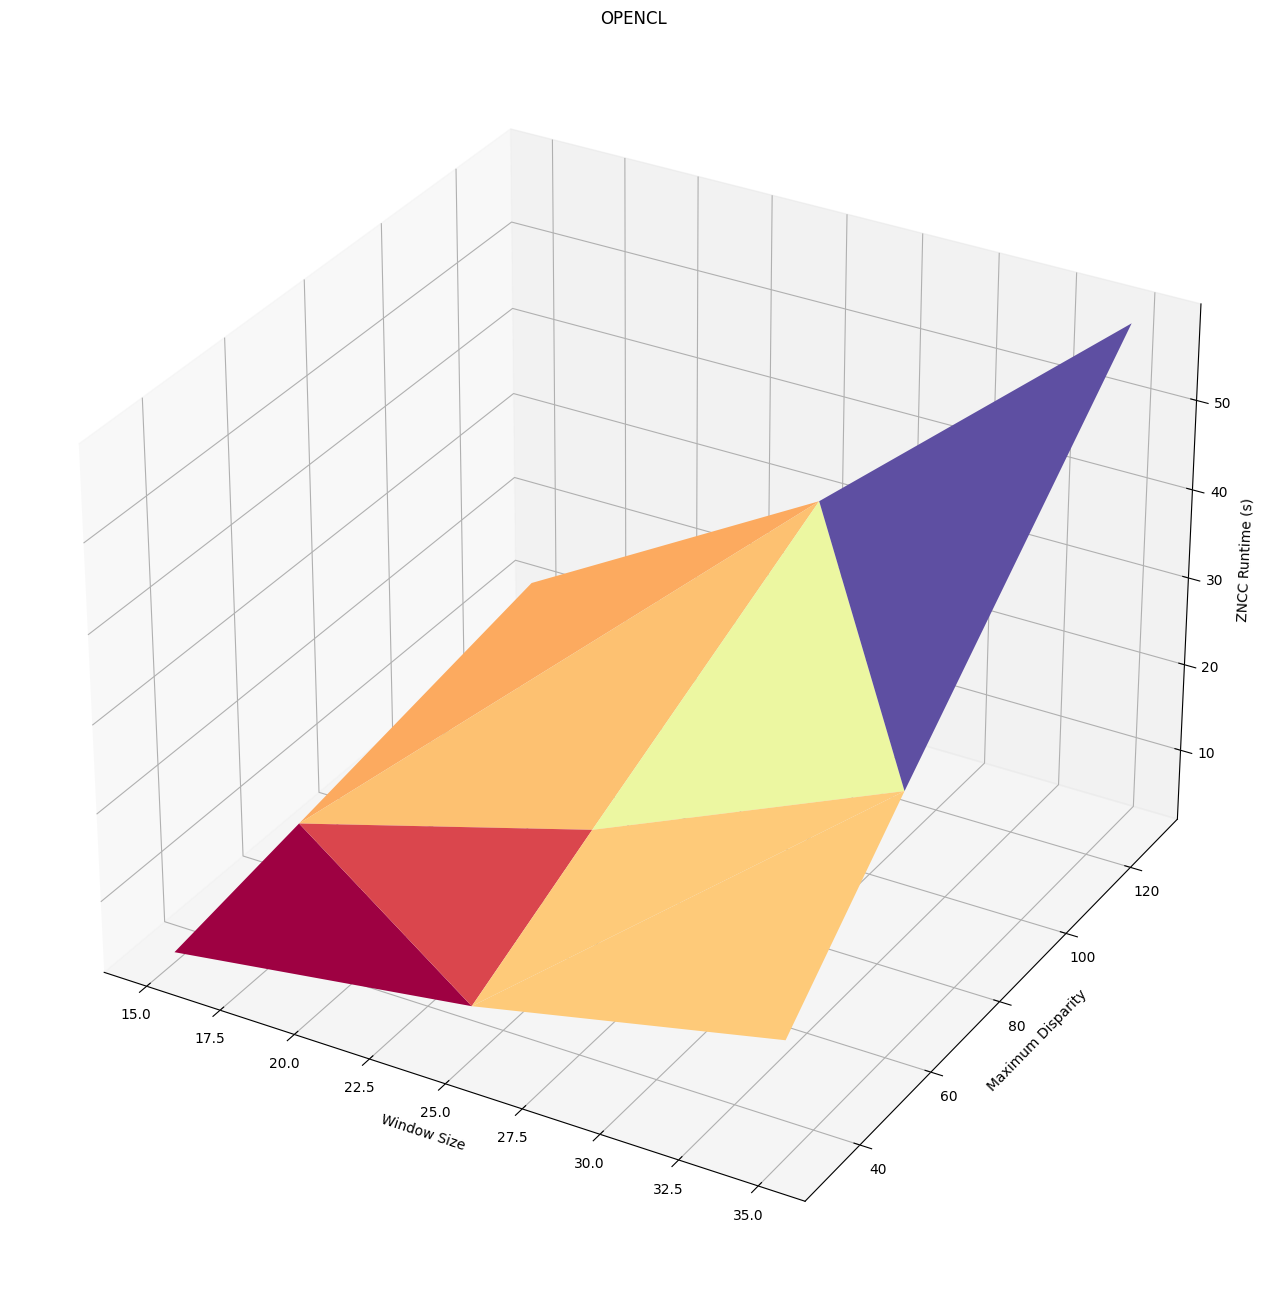

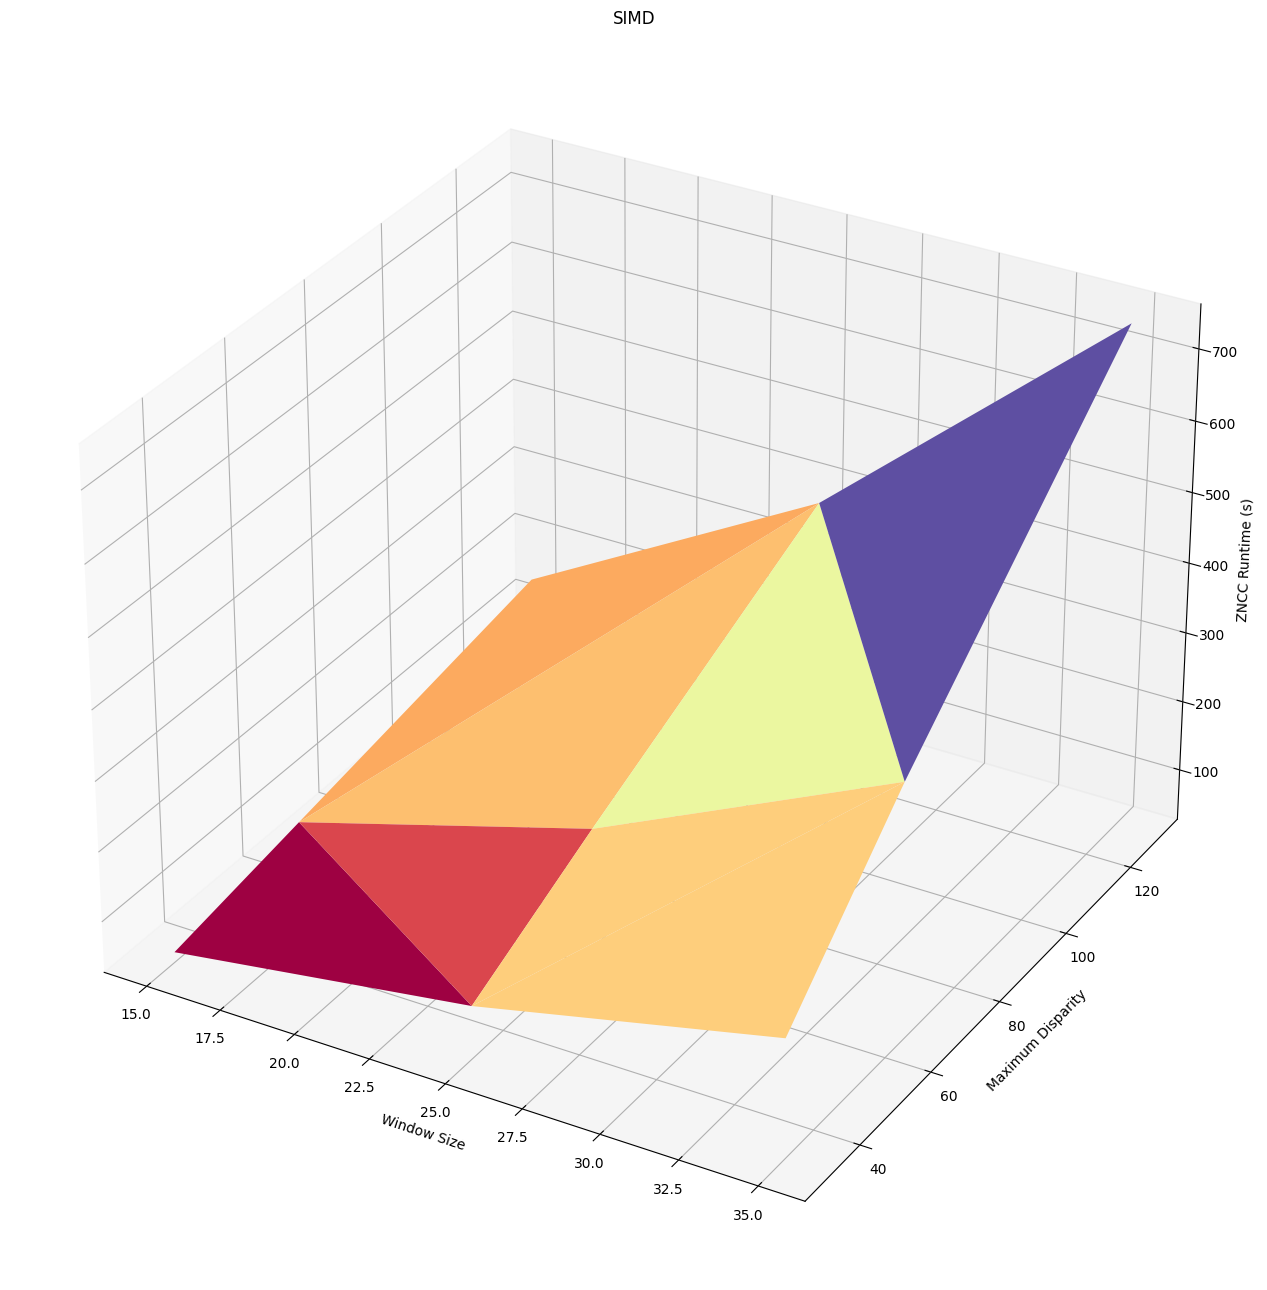

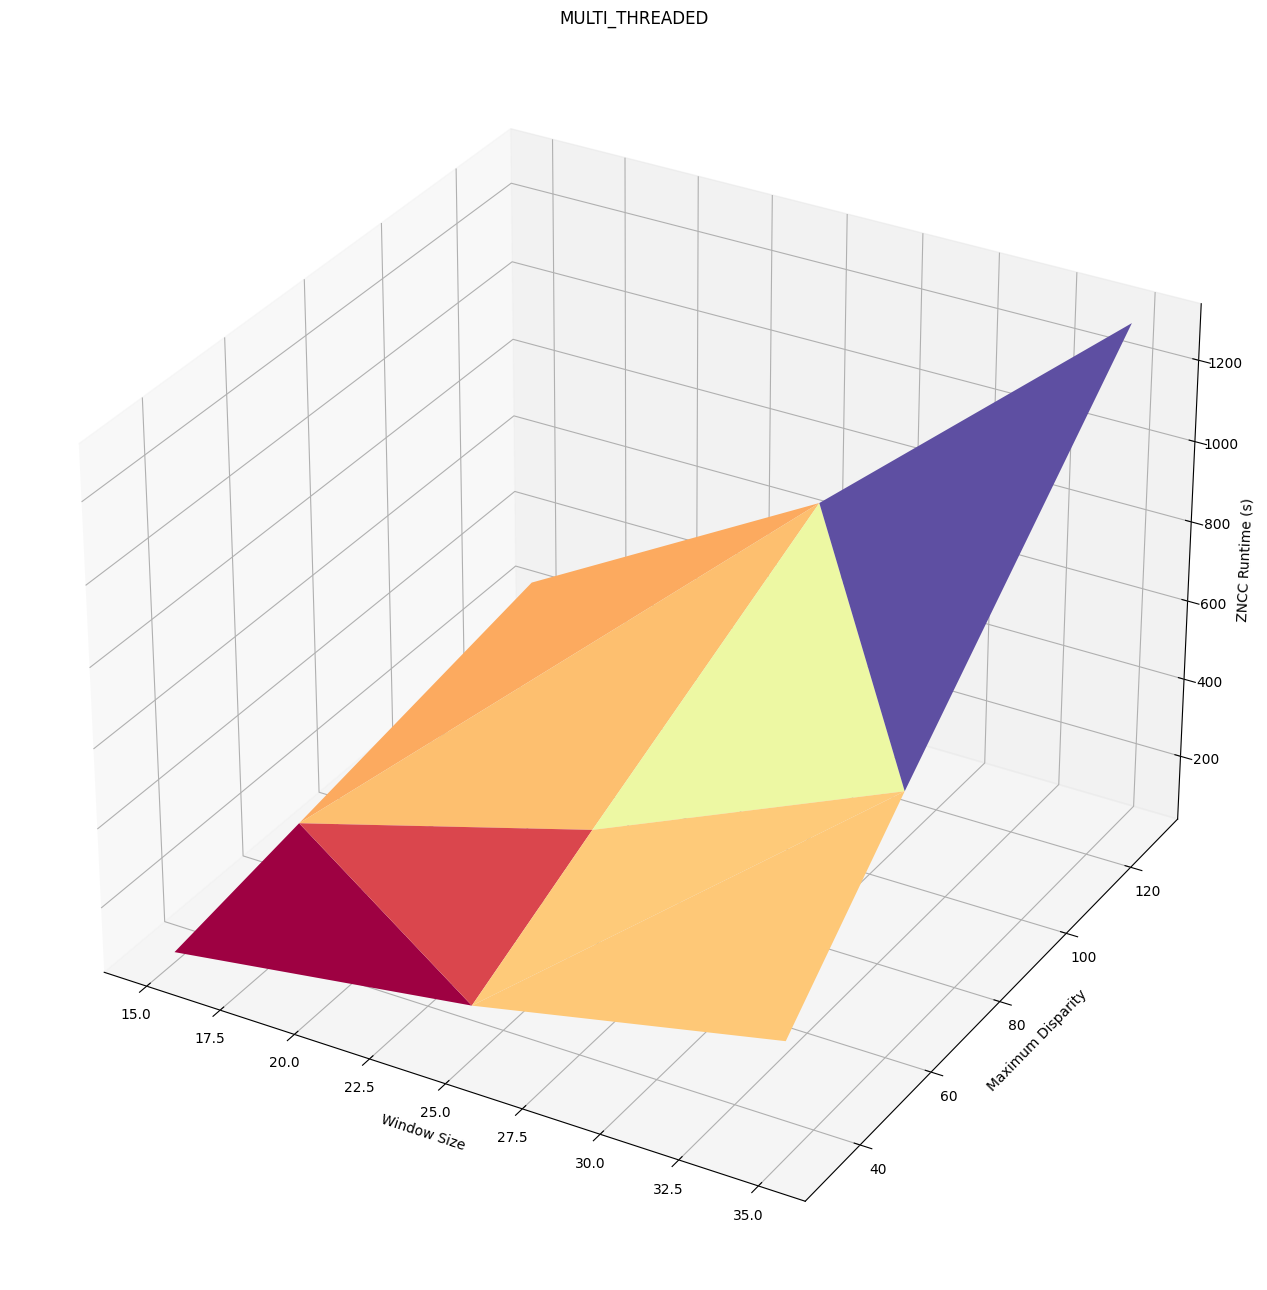

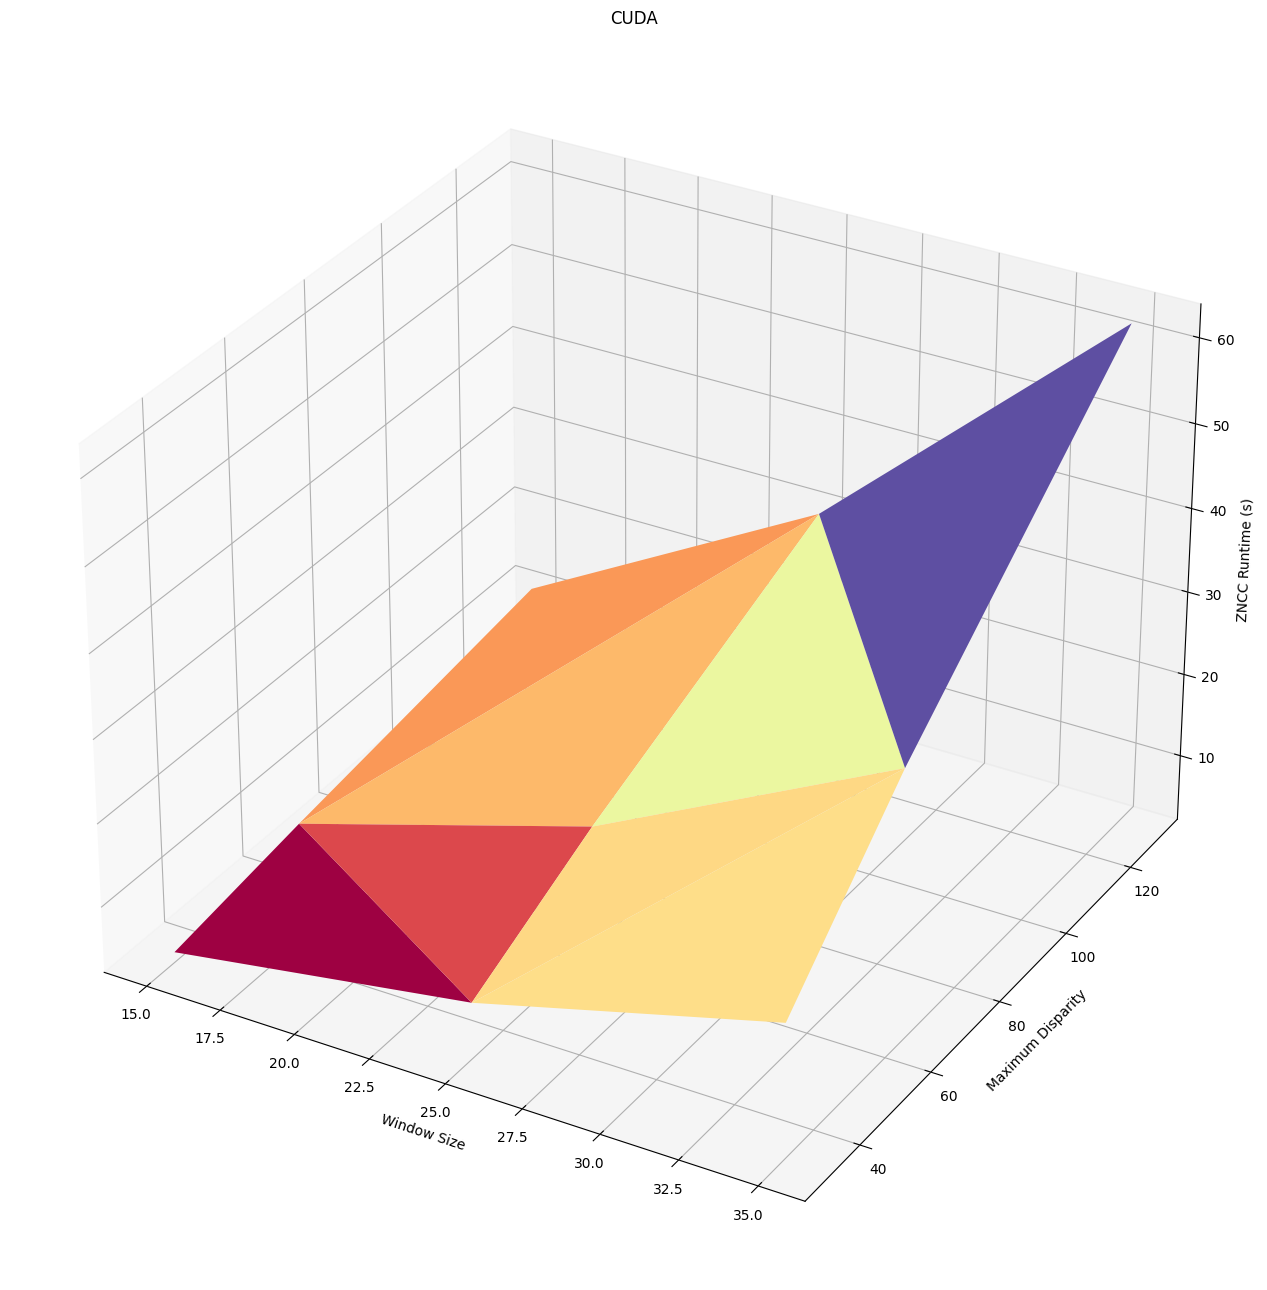

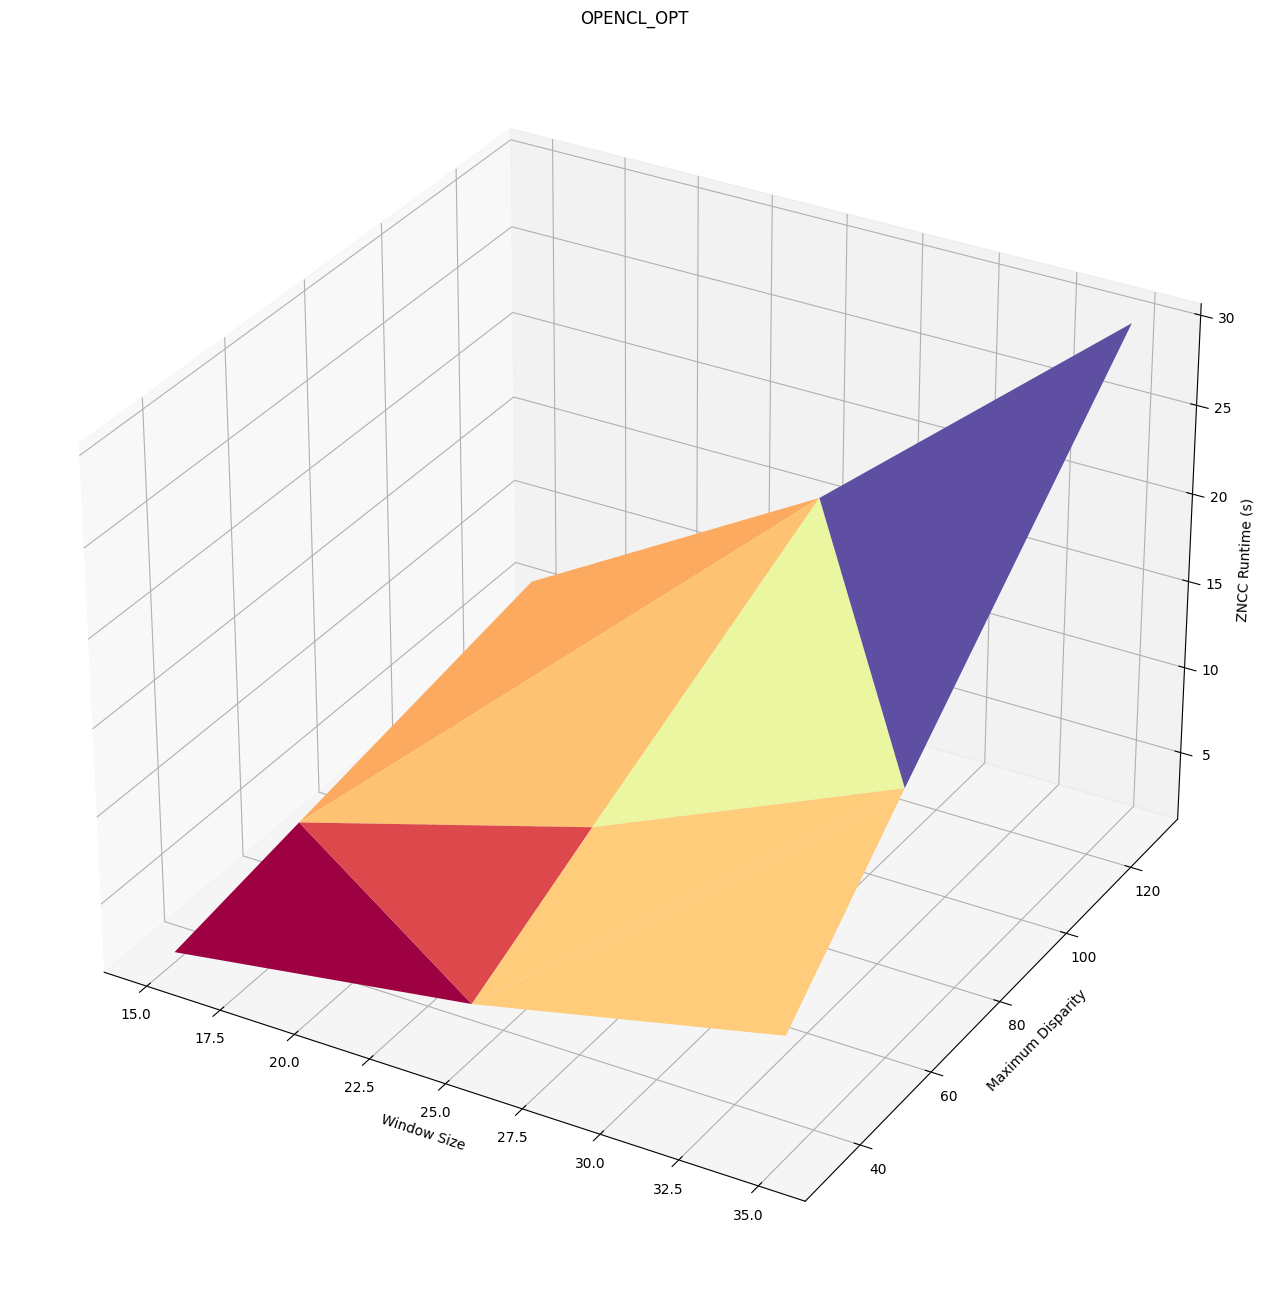

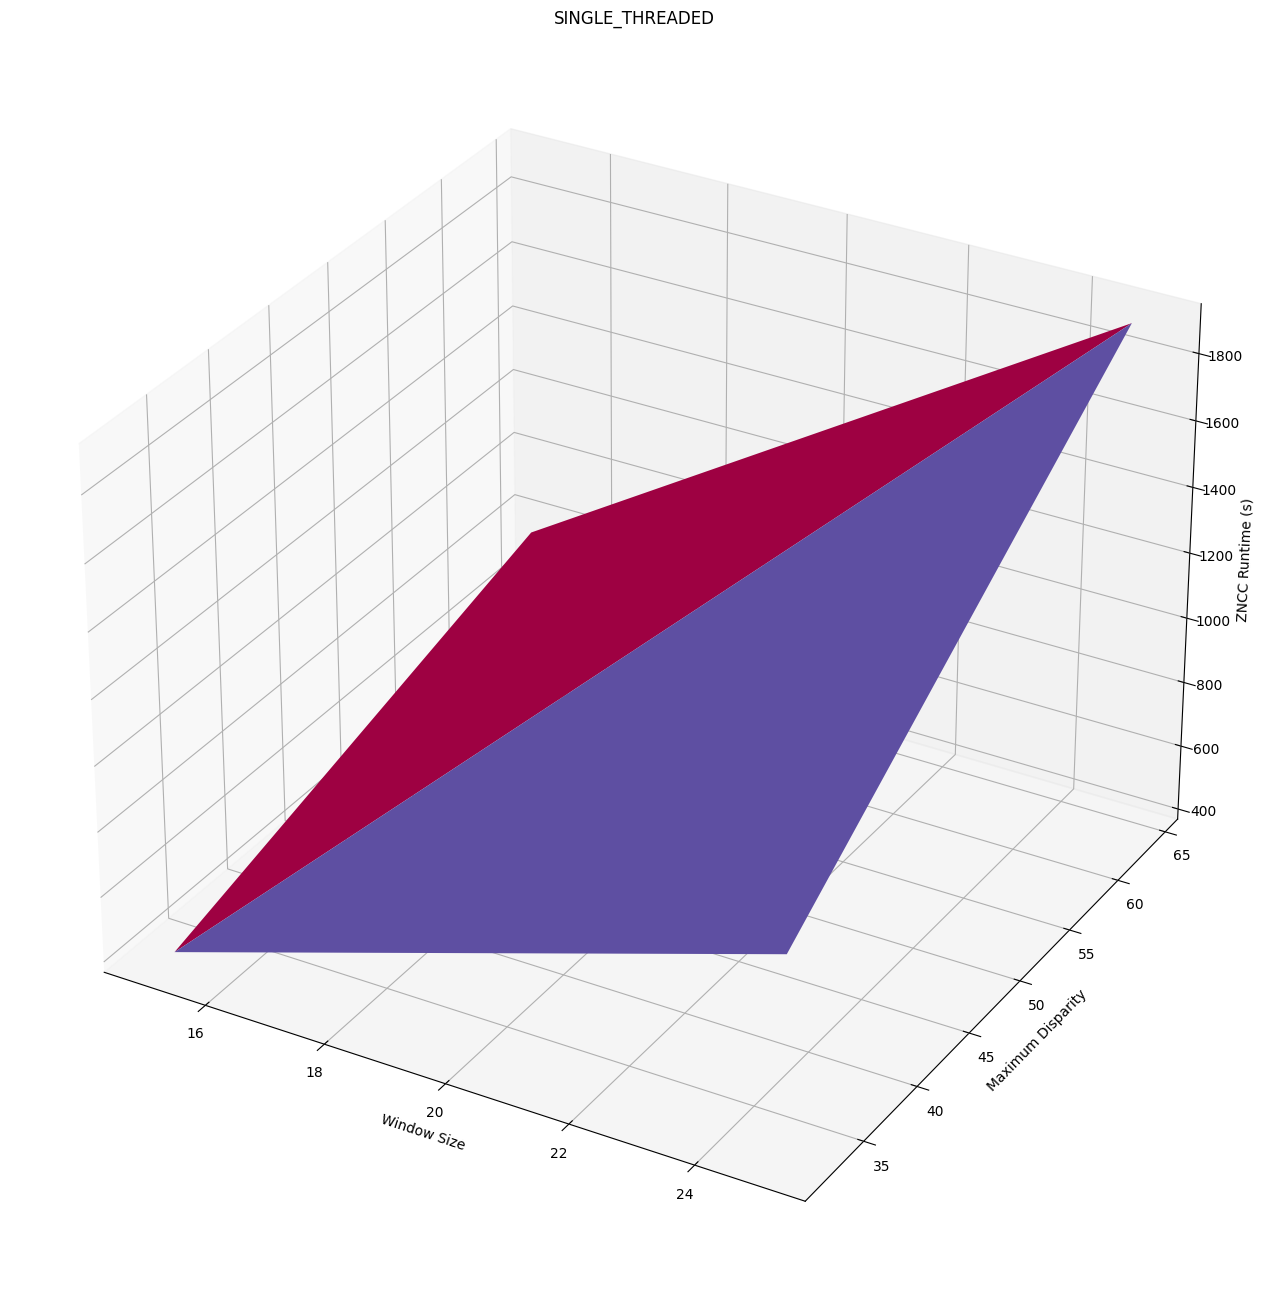

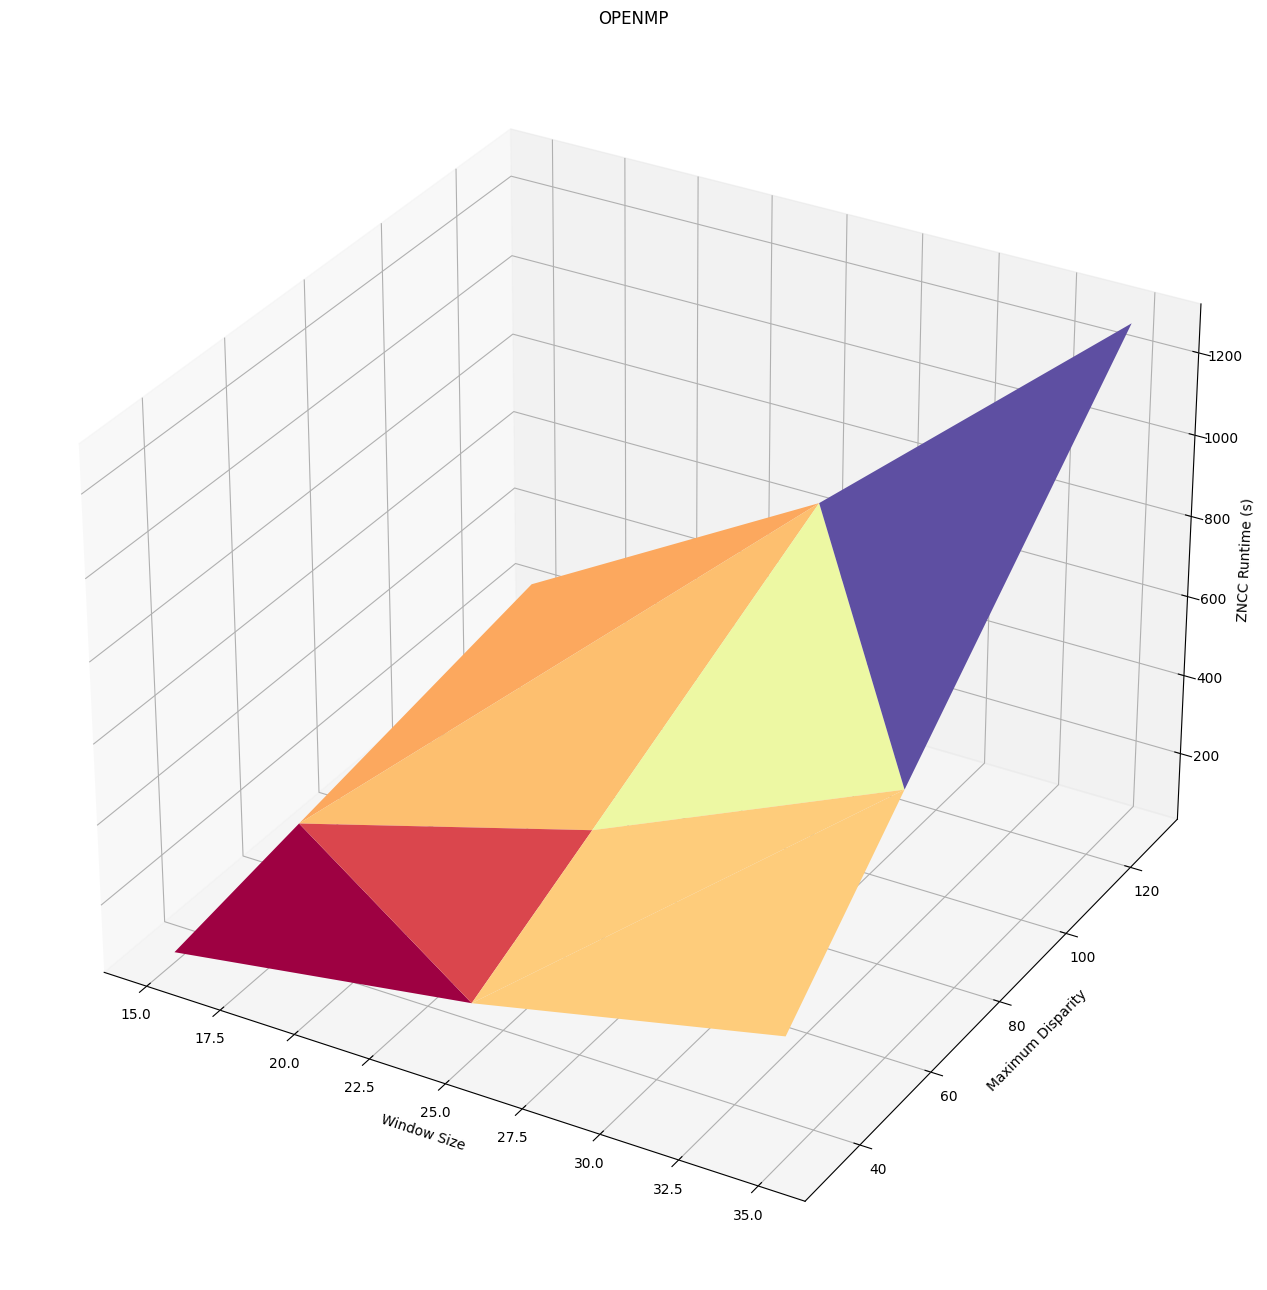

In [3]:
df_ = df[df['platformId'] == 1][df['resizeFactor'] == 2]

for method in methods:
    # try catch block
    try:
        print(method)
        df_tmp = df_[df_['method'] == method][['winSize', 'maxDisp', 'znccTime']].sort_values(by=['winSize', 'maxDisp'])
        x = df_tmp['winSize']
        y = df_tmp['maxDisp']
        z = df_tmp['znccTime']

        ax = plt.figure(figsize=(13, 13)).add_subplot(projection='3d')
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, cmap=plt.cm.Spectral)
        ax.set_title(method)
        ax.set_xlabel('Window Size')
        ax.set_ylabel('Maximum Disparity')
        ax.set_zlabel('ZNCC Runtime (s)')

        plt.tight_layout()
        plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_method_{method}.png')
    except:
        pass

C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\3071950647.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tmp = df[df['platformId'] == 1][df['resizeFactor'] == 2][['method','winSize', 'maxDisp', 'znccTime', 'postprocTime']]


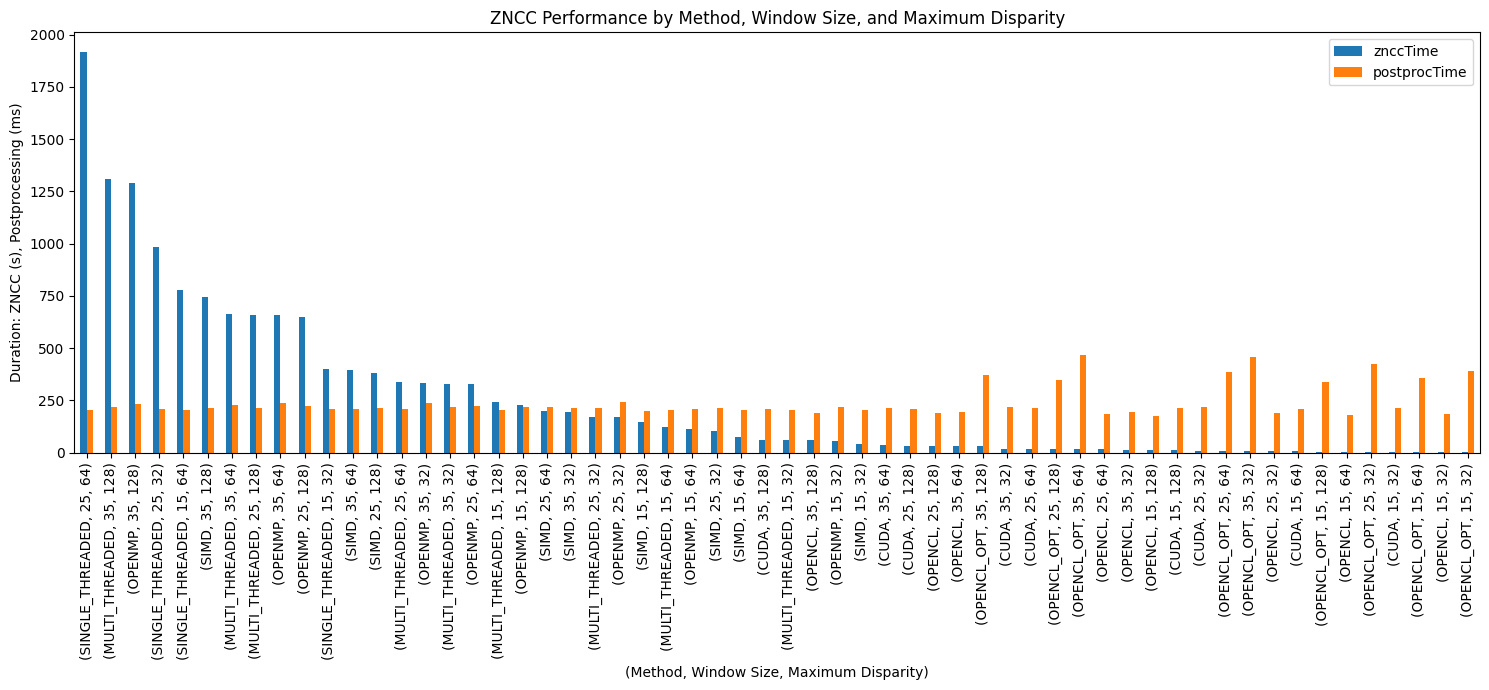

In [4]:
df_tmp = df[df['platformId'] == 1][df['resizeFactor'] == 2][['method','winSize', 'maxDisp', 'znccTime', 'postprocTime']]
df_tmp = df_tmp.groupby(['method', 'winSize', 'maxDisp'], as_index=True).mean()
df_tmp = df_tmp.sort_values(['znccTime'], ascending=False)
df_tmp.head()
ax = df_tmp.plot.bar(y=['znccTime', 'postprocTime'], figsize=(15, 7))
ax.set_xlabel('(Method, Window Size, Maximum Disparity)')
ax.set_ylabel('Duration: ZNCC (s), Postprocessing (ms)')
ax.set_title('ZNCC Performance by Method, Window Size, and Maximum Disparity')
df_tmp.head()

plt.tight_layout()
plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_full.png')

C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\1041500760.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tmp = df[df['platformId'] == 1][df['resizeFactor'] == 2][['method','winSize', 'maxDisp', 'znccTime']]


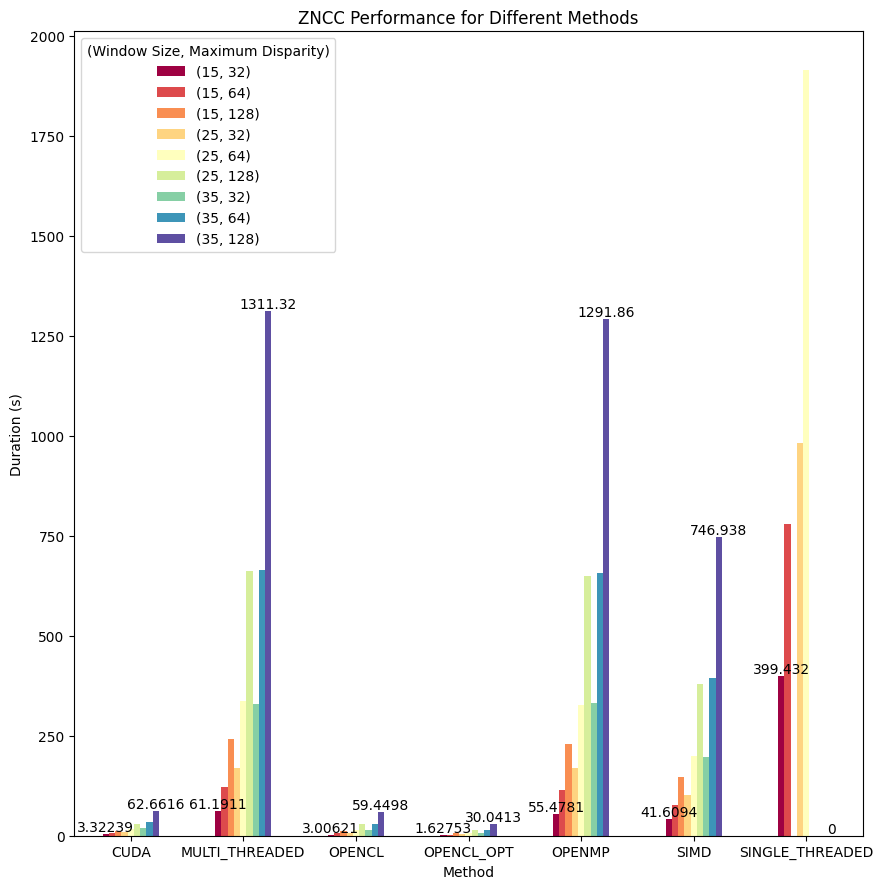

In [5]:
df_tmp = df[df['platformId'] == 1][df['resizeFactor'] == 2][['method','winSize', 'maxDisp', 'znccTime']]
df_tmp = df_tmp.groupby(['method', 'winSize', 'maxDisp'], as_index=True).mean()
df_tmp_ = df_tmp.unstack(level=0)
df_tmp = df_tmp.unstack(level=[1, 2])
ax = df_tmp.plot.bar(figsize=(9, 9), rot=0, color=plt.cm.Spectral(np.linspace(0, 1, len(df_tmp.columns))))
ax.set_xlabel('Method')
ax.set_ylabel('Duration (s)')
ax.set_title('ZNCC Performance for Different Methods')
ax.legend(df_tmp_.index, title="(Window Size, Maximum Disparity)")
ax.bar_label(ax.containers[-1], label_type='edge')
ax.bar_label(ax.containers[0], label_type='edge')
df_tmp.head()

plt.tight_layout()
plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_method_group.png')

C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\3271547612.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tmp = df[df['method'].isin(cpu_methods)][df['resizeFactor'] == 2][['method', 'winSize', 'maxDisp', 'znccTime']]


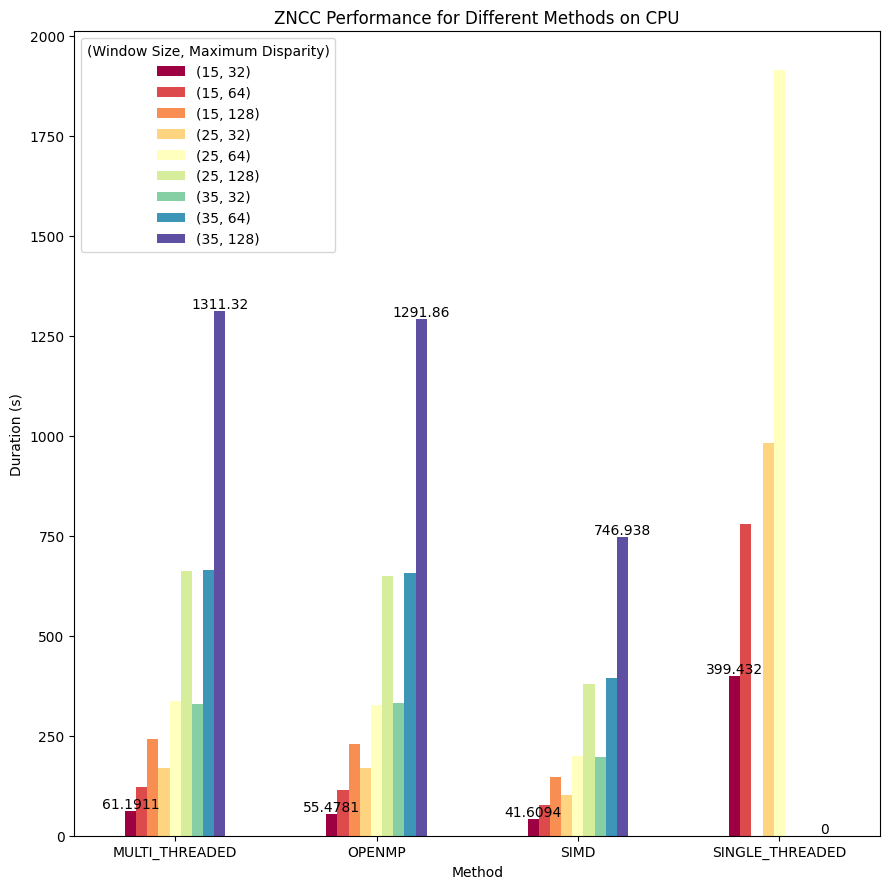

In [6]:
df_tmp = df[df['method'].isin(cpu_methods)][df['resizeFactor'] == 2][['method', 'winSize', 'maxDisp', 'znccTime']]
df_tmp = df_tmp.groupby(['method', 'winSize', 'maxDisp'], as_index=True).mean()
df_tmp_ = df_tmp.unstack(level=0)
df_tmp = df_tmp.unstack(level=[1, 2])
ax = df_tmp.plot.bar(figsize=(9, 9), rot=0, color=plt.cm.Spectral(np.linspace(0, 1, len(df_tmp.columns))))
ax.set_xlabel('Method')
ax.set_ylabel('Duration (s)')
ax.set_title('ZNCC Performance for Different Methods on CPU')
ax.legend(df_tmp_.index, title="(Window Size, Maximum Disparity)")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[-1], label_type='edge')
df_tmp.head()

plt.tight_layout()
plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_cpu_group.png')

C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\3668836496.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tmp = df[df['method'].isin(gpu_methods)][df['resizeFactor'] == 2][['method', 'winSize', 'maxDisp', 'znccTime']]


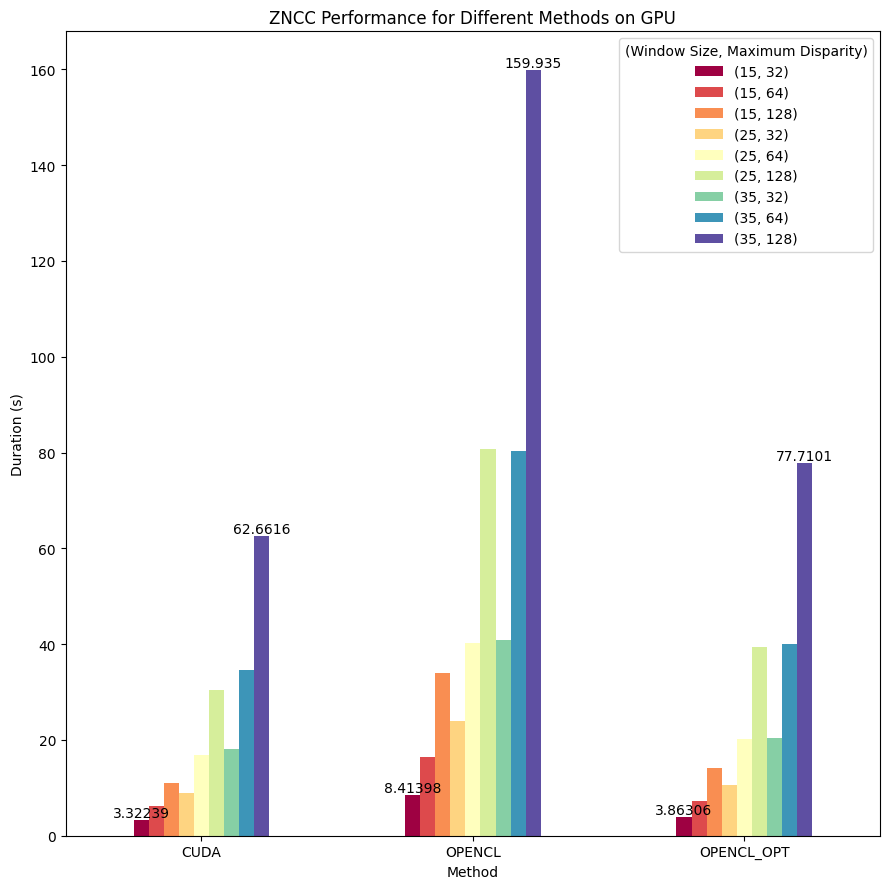

In [7]:
df_tmp = df[df['method'].isin(gpu_methods)][df['resizeFactor'] == 2][['method', 'winSize', 'maxDisp', 'znccTime']]
df_tmp = df_tmp.groupby(['method', 'winSize', 'maxDisp'], as_index=True).mean()
df_tmp_ = df_tmp.unstack(level=0)
df_tmp = df_tmp.unstack(level=[1, 2])
ax = df_tmp.plot.bar(figsize=(9, 9), rot=0, color=plt.cm.Spectral(np.linspace(0, 1, len(df_tmp.columns))))
ax.set_xlabel('Method')
ax.set_ylabel('Duration (s)')
ax.set_title('ZNCC Performance for Different Methods on GPU')
ax.legend(df_tmp_.index, title="(Window Size, Maximum Disparity)")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[-1], label_type='edge')
df_tmp.head()

plt.tight_layout()
plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_gpu_group.png')

C:\Users\husmen\AppData\Local\Temp\ipykernel_8524\2476036825.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tmp = df[df['method'].isin(['OPENCL', 'OPENCL_OPT'])][df['resizeFactor'] == 2][['method', 'platformId', 'winSize', 'maxDisp', 'znccTime']]


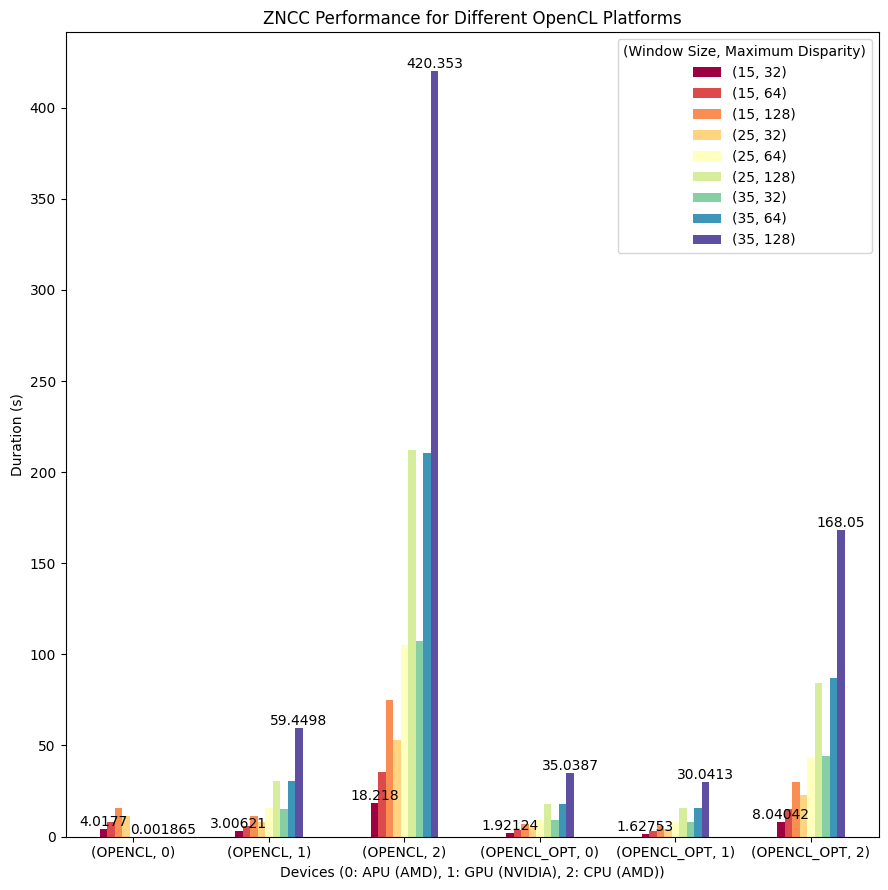

In [8]:
df_tmp = df[df['method'].isin(['OPENCL', 'OPENCL_OPT'])][df['resizeFactor'] == 2][['method', 'platformId', 'winSize', 'maxDisp', 'znccTime']]
df_tmp = df_tmp.groupby(['method', 'platformId', 'winSize', 'maxDisp'], as_index=True).mean()
df_tmp_ = df_tmp.unstack(level=[0, 1])
df_tmp = df_tmp.unstack(level=[2, 3])
ax = df_tmp.plot.bar(figsize=(9, 9), rot=0, color=plt.cm.Spectral(np.linspace(0, 1, len(df_tmp.columns))))
ax.set_xlabel('Devices (0: APU (AMD), 1: GPU (NVIDIA), 2: CPU (AMD))')
ax.set_ylabel('Duration (s)')
ax.set_title('ZNCC Performance for Different OpenCL Platforms')
ax.legend(df_tmp_.index, title="(Window Size, Maximum Disparity)")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[-1], label_type='edge')
df_tmp.head()

plt.tight_layout()
plt.savefig(f'D:/ws/DepthZNCC/graphs/profile_devices_group.png')